### Importation of packages

In [1]:
# this is just a script to plot the figures that will be used in the paper
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np 

sns.set_style('darkgrid')

fitness_names = ["fitness_1", "fitness_2"]
names2labels = {fitness_names[0] : "Total soybean yield over 10 years (tons)",
                fitness_names[1] : "Inter-year variance (tons)"}

### Plot of the 1st generation Pareto front

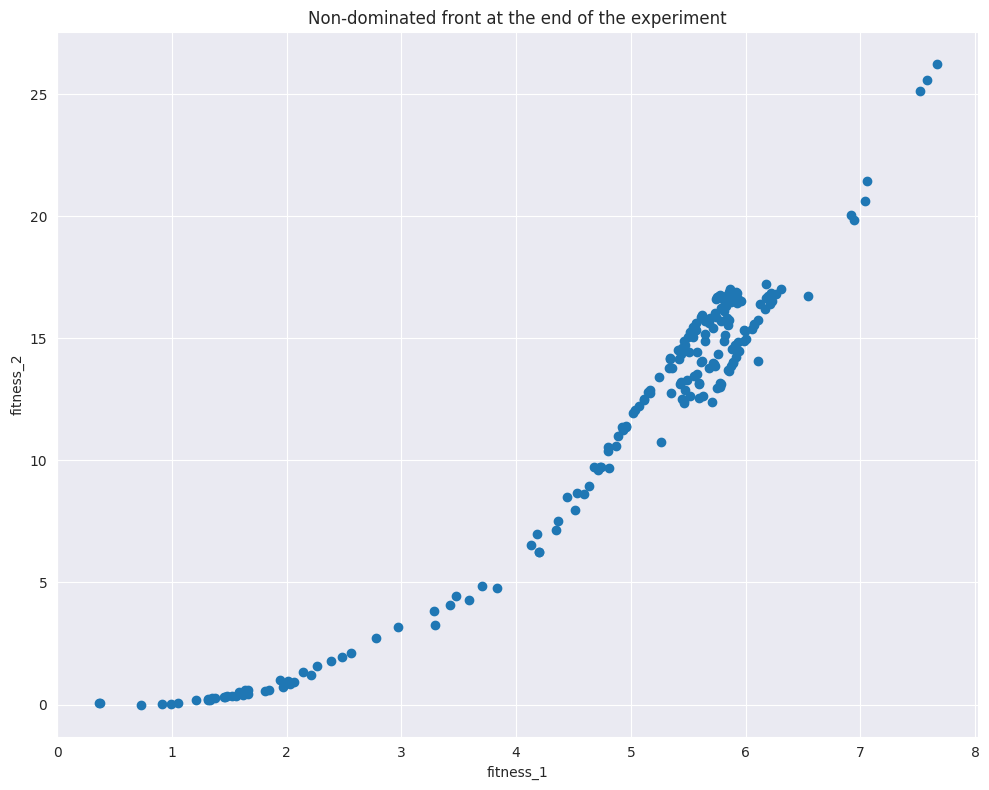

In [2]:
# let's start with something simple: we plot the final Pareto front from one of the experiments
data_file = "./unique-name/42-population.csv-generation-0.csv"
df = pd.read_csv(data_file)

x = df[fitness_names[0]].values
y = df[fitness_names[1]].values

fig = plt.figure(figsize=(10, 8))
axes = plt.axes()
axes.scatter(x, y)

axes.set_title("Non-dominated front at the end of the experiment")
axes.set_xlabel(fitness_names[0])
axes.set_ylabel(fitness_names[1])

plt.tight_layout()
plt.show()

### Getting the last generation index

In [3]:
import os

path = "./unique-name/" 
file_prefix = "42-population.csv-generation-"


gen = 0
absolute_path = path + file_prefix + f"{0}.csv"

while os.path.exists(absolute_path) :
    gen+=1
    absolute_path = path + file_prefix + f"{gen}.csv"


last_gen = gen-1

In [13]:
file = open("./unique-name/true_elasticities.txt", "r")

lines = file.readlines()

n_fitness = len(fitness_names)
n_gene = len(df.columns) - n_fitness - 1

true_gene = []
true_fitness = []
for i, line in enumerate(lines) :
    if i < n_gene :
        true_gene.append(float(line))
    else :
        true_fitness.append(float(line))

#true_fitness = [[float(a)] for a in lines]

print(true_gene)
print(true_fitness)


[0.19443622883082012, 0.9438048691199492, 0.40753316659052774]
[0.0, 0.25]


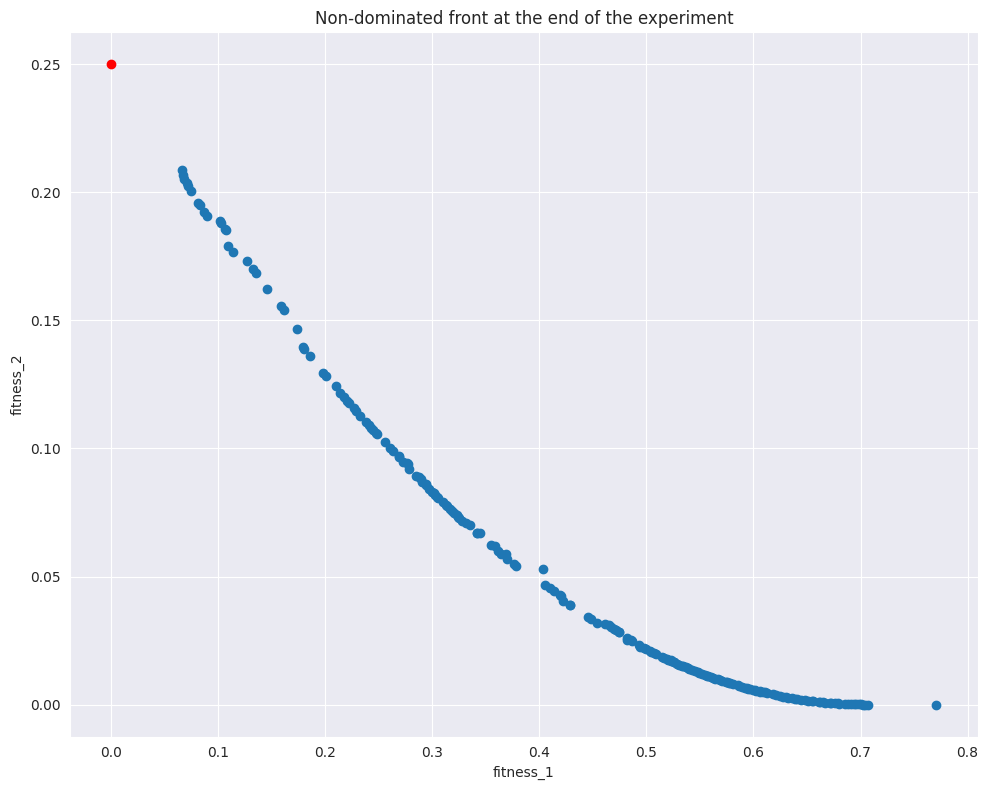

In [14]:
# let's start with something simple: we plot the final Pareto front from one of the experiments
data_file = f"./unique-name/42-population.csv-generation-{last_gen}.csv"
df = pd.read_csv(data_file)

x = df[fitness_names[0]].values
y = df[fitness_names[1]].values

fig = plt.figure(figsize=(10, 8))
axes = plt.axes()
axes.scatter(x, y)
axes.scatter(true_fitness[0], true_fitness[1], color='red')
axes.set_title("Non-dominated front at the end of the experiment")
axes.set_xlabel(fitness_names[0])
axes.set_ylabel(fitness_names[1])

plt.tight_layout()
plt.show()

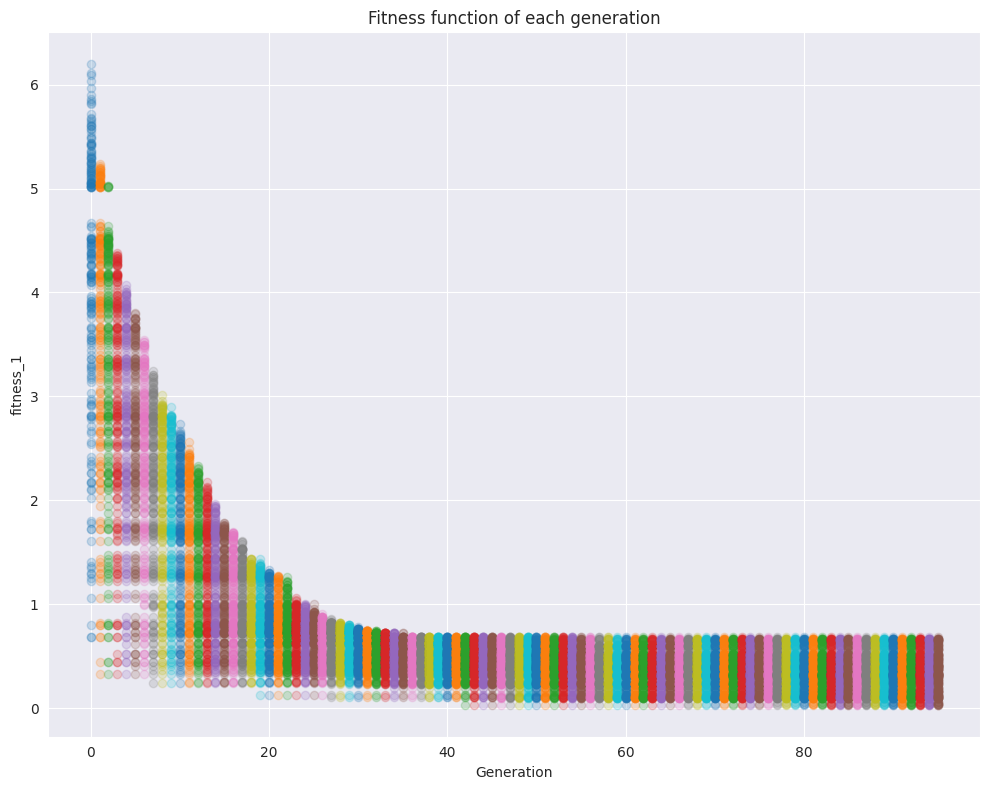

In [6]:
df = []
fig = plt.figure(figsize=(10, 8))
axes = plt.axes()

fit_index =  0

for gen in range(last_gen) :
    # We get the data of each generation
    data_file = f"./unique-name/42-population.csv-generation-{gen}.csv"
    df = pd.read_csv(data_file)


    x = df[fitness_names[fit_index]].values
    y = [gen for _ in x]
    axes.scatter(y, x, alpha=0.2)

axes.set_title("Fitness function of each generation")
axes.set_xlabel("Generation")
axes.set_ylabel(fitness_names[0])

plt.tight_layout()
plt.show()

In [45]:
data_file = f"./unique-name/42-population.csv-generation-{last_gen}.csv"
df = pd.read_csv(data_file)

index_fitness = 1
# We take this fitness as thing to look
list_fitness = df[fitness_names[index_fitness]].to_list()

list_elasticity = []

gen=0
while f"gene_{gen}" in df.columns :
    list_elasticity.append(df[f"gene_{gen}"].values)
    gen+=1

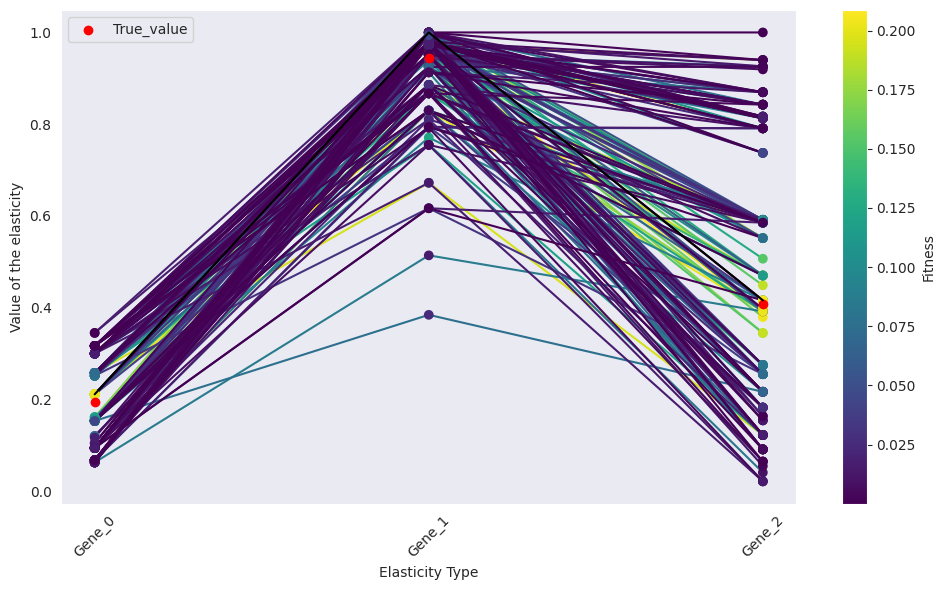

In [46]:
def plot_distribution(plot_line = True) :
    import matplotlib.pyplot as plt
    
    # data conformation

    # There is a list for each elasticity
    N_elasticity = len(list_elasticity)
    # For each elasticity, the i-th element represent the elasticity of an individual at the last generation
    N_individual = len(list_elasticity[0])


    distributions = {}
    labels = []

    # creation of a dictionnary that contain all the individual elasticities for each elasticity
    for i in range(N_elasticity):
        label = f'Gene_{i}'
        labels.append(label)
        distributions[label] = list_elasticity[i]


    # x contain the name of the elasticity
    x_labels = []
    x_true = []
    # y contain the value of the elsaticity
    y_values = []
    # Color contain the value of the fitness of the individual converted to a color map
    colors = []

    i = 0
    for label, values in distributions.items():
        x_labels.extend([label] * N_individual)
        y_values.extend(values)
        colors.extend([list_fitness[i] for i in range(N_individual)])

        # For the true value
        x_true.append(label)




    plt.figure(figsize=(10, 6))

    cmap = plt.cm.viridis

    if plot_line == True : 
        
        # List of index sorted in from the biggest to the smallest fitness coeff
        index_sorted = np.argsort(list_fitness)[::-1]
        
        xs = [label for label in labels]  

        # Normalisation of the list of fitness for the color map
        min_val = min(list_fitness)
        max_val = max(list_fitness)
        normalized_fitness = [(x - min_val) / (max_val - min_val) for x in list_fitness]


        # Then we plot lines for every individuals browse from the biggest fitness to the smallest 
        for i in index_sorted :

            ys = [distributions[label][index_sorted[i]] for label in labels]

            plt.plot(xs, ys, color=plt.cm.viridis(normalized_fitness[i]), alpha=1, zorder=1)
            
            # The best one
            if i == index_sorted[-1] :
                plt.plot(xs, ys, color="black")
            

    plt.scatter(x_labels, y_values, c=colors, cmap=cmap)
    plt.colorbar(label='Fitness')
    
    plt.scatter(x_true, true_gene, c='red', label="True_value")


    plt.xlabel('Elasticity Type')
    plt.ylabel('Value of the elasticity')
    plt.xticks(rotation=45)  
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.grid(False)
    plt.show()

plot_distribution(plot_line=True)

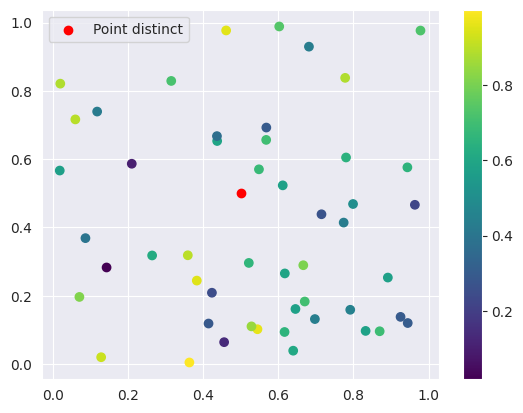

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Générer des données
np.random.seed(0)
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50)  # Valeurs pour la colormap

# Créer un scatter plot avec une colormap
scatter = plt.scatter(x, y, c=colors, cmap='viridis')
plt.colorbar(scatter)

# Ajouter un point supplémentaire avec une couleur différente
plt.scatter(0.5, 0.5, color='red', label='Point distinct')

# Ajouter une légende
plt.legend()

# Afficher le plot
plt.show()

IndexError: list index out of range

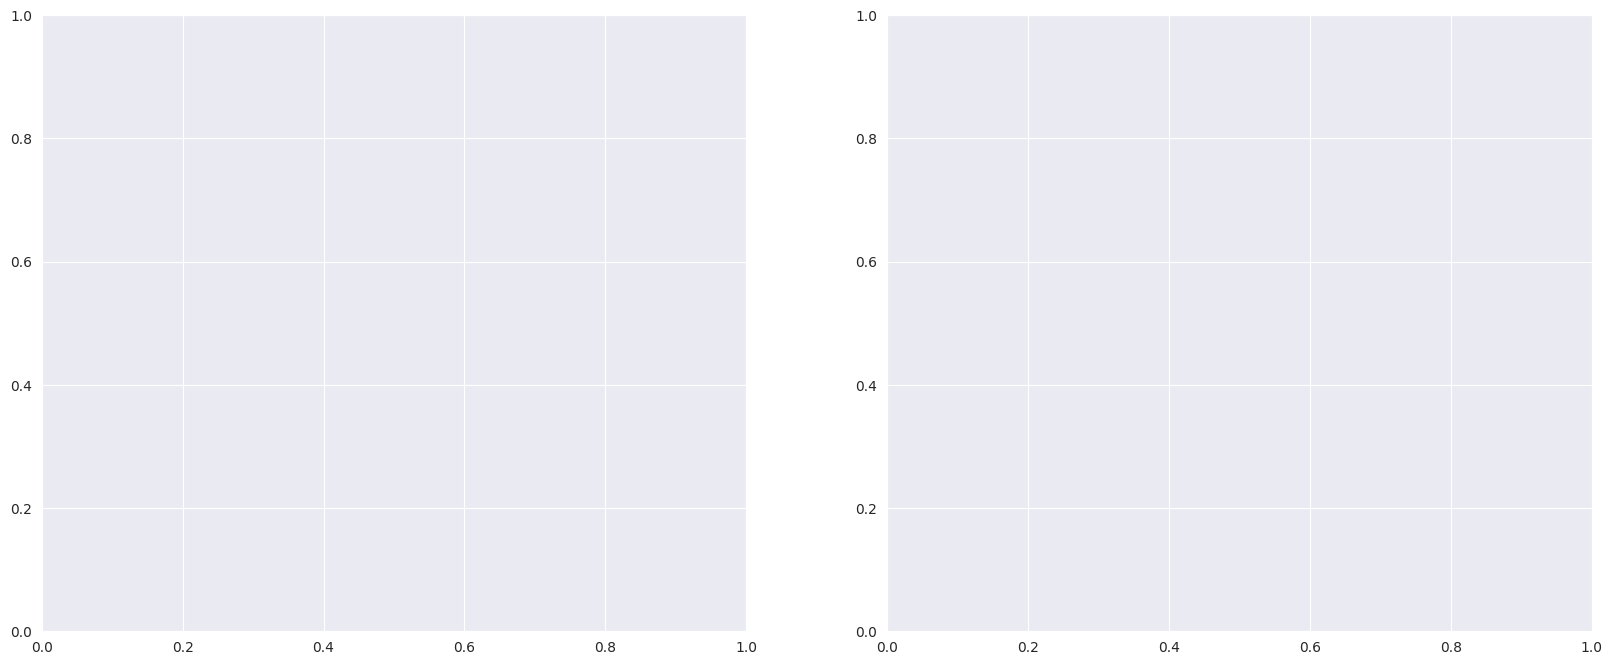

In [9]:
# now, here I need to perform some dark magic to avoid issues with labels
df[fitness_names[0]] = df[fitness_names[0]].values * -1.0

# this plot kinda sucks, though; maybe it's better to have two plots side by side
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121) # 1x2 grid, 1st subplot
ax2 = fig.add_subplot(122) # 1x2 grid, 2nd subplot

sns.scatterplot(data=df, x=fitness_names[0], y=fitness_names[1], hue=fitness_names[2], ax=ax1)
ax1.set_xlabel(names2labels[fitness_names[0]])
ax1.set_ylabel(names2labels[fitness_names[1]])
ax1.invert_xaxis()

sns.scatterplot(data=df, x=fitness_names[0], y=fitness_names[2], hue=fitness_names[1], ax=ax2)
ax2.set_xlabel(names2labels[fitness_names[0]])
ax2.set_ylabel(names2labels[fitness_names[2]])
ax2.invert_xaxis()

fig.suptitle("Final non-dominated front", fontsize=20)

plt.savefig("../results/2024-01-19-soja-allocation-3-objectives-gen520.png", dpi=300)